# Invert & Extrovert Personality Prediction
## Simple Logistic Regression Model by Abdul Wajad

In [35]:
# importing required liberaries
import pandas as pd
import numpy as np
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [36]:
file_path = r"D:\Local Disk\_python_prog\awfera ML\train.csv"
# reading the csv file
df = pd.read_csv(file_path)
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
   id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   
3   3               3.0         No                      7.0            3.0   
4   4               1.0         No                      4.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0             5.0   Extrovert  
1                        No                 10.0             8.0   Extrovert  
2                       NaN                  3.0             0.0   Introvert  
3                        No                 11.0             5.0   Extrovert  
4                        No                 13.0             NaN   Extrovert  


## Data Preprocessing

In [37]:
# Display the summary of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [38]:
# Display the data types of the dataframe
df.dtypes

id                             int64
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [39]:
# Display the shape of the dataframe
df.shape

(18524, 9)

In [40]:
# checking missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [41]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


## Handling missing values

In [42]:
# Filling missing values in 'Time_spent_Alone' with the mean
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)
# Filling missing values in 'Stage_fear' with the mode of 'Stage_fear'
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
# Filling missing values in 'Social_event_attendance' with the mean
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)
# Filling missing values in 'Going_outside' with the mean
df['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)
# Filling missing values in 'Drained_after_socializing' with the mode
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)
# Filling missing values in 'Friends_circle_size' with the mean
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(), inplace=True)
# Filling missing values in 'Post_frequencye' with the mean
df['Post_frequency'].fillna(df['Post_frequency'].mean(), inplace=True)






In [43]:
# Checking missing values after filling
df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [44]:
# dropping duplicate values
df.drop_duplicates(inplace=True)

In [45]:
df.shape

(18524, 9)

## Transforming the data

In [46]:
cleaned_df = df.copy()


In [47]:
cleaned_df.sample(2)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
7750,7750,1.000000,No,5.0,5.0,No,11.0,7.0,Extrovert
16393,16393,3.137764,Yes,3.0,3.0,Yes,3.0,3.0,Introvert


## Feature Scaling


In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [49]:
scaler = MinMaxScaler()
cleaned_df[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',]] = scaler.fit_transform(cleaned_df[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside']])

In [50]:
cleaned_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.000000,No,0.6,0.571429,No,15.0,5.000000,Extrovert
1,1,0.090909,No,0.7,0.428571,No,10.0,8.000000,Extrovert
2,2,0.545455,Yes,0.1,0.000000,No,3.0,0.000000,Introvert
3,3,0.272727,No,0.7,0.428571,No,11.0,5.000000,Extrovert
4,4,0.090909,No,0.4,0.571429,No,13.0,4.982097,Extrovert


In [51]:
le = LabelEncoder()
# Encoding categorical variables
cleaned_df[['Stage_fear', 'Drained_after_socializing']] = cleaned_df[['Stage_fear', 'Drained_after_socializing']].apply(le.fit_transform)

In [52]:
cleaned_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.000000,0,0.6,0.571429,0,15.0,5.000000,Extrovert
1,1,0.090909,0,0.7,0.428571,0,10.0,8.000000,Extrovert
2,2,0.545455,1,0.1,0.000000,0,3.0,0.000000,Introvert
3,3,0.272727,0,0.7,0.428571,0,11.0,5.000000,Extrovert
4,4,0.090909,0,0.4,0.571429,0,13.0,4.982097,Extrovert


### Finding outliers isomg Z-score method

In [53]:
from scipy.stats import zscore
# Calculating z-scores for numerical columns
z_scores = np.abs(zscore(cleaned_df[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']]))
outliers = (z_scores > 3).any(axis=1)
print(f"Here are outliers: {outliers}")
# Removing outliers
cleaned_df = cleaned_df[~outliers]
# Displaying the cleaned dataframe
print("Cleaned DataFrame after removing outliers:")
print(cleaned_df.head())
# Displaying the shape of the cleaned dataframe 
print("Shape of the cleaned DataFrame:")
print(cleaned_df.shape)

Here are outliers: [False False False ... False False False]
Cleaned DataFrame after removing outliers:
   id  Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0   0          0.000000           0                      0.6       0.571429   
1   1          0.090909           0                      0.7       0.428571   
2   2          0.545455           1                      0.1       0.000000   
3   3          0.272727           0                      0.7       0.428571   
4   4          0.090909           0                      0.4       0.571429   

   Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                          0                 15.0        5.000000   Extrovert  
1                          0                 10.0        8.000000   Extrovert  
2                          0                  3.0        0.000000   Introvert  
3                          0                 11.0        5.000000   Extrovert  
4                    

## Data Visualization

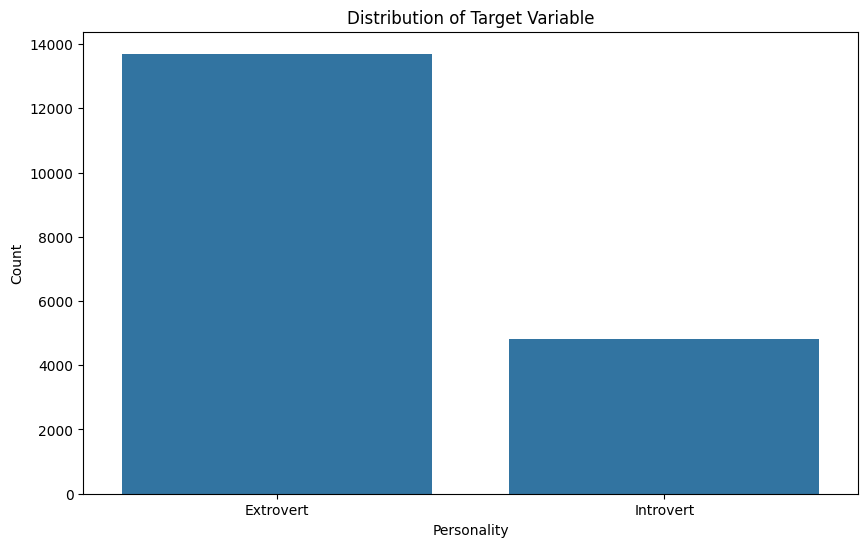

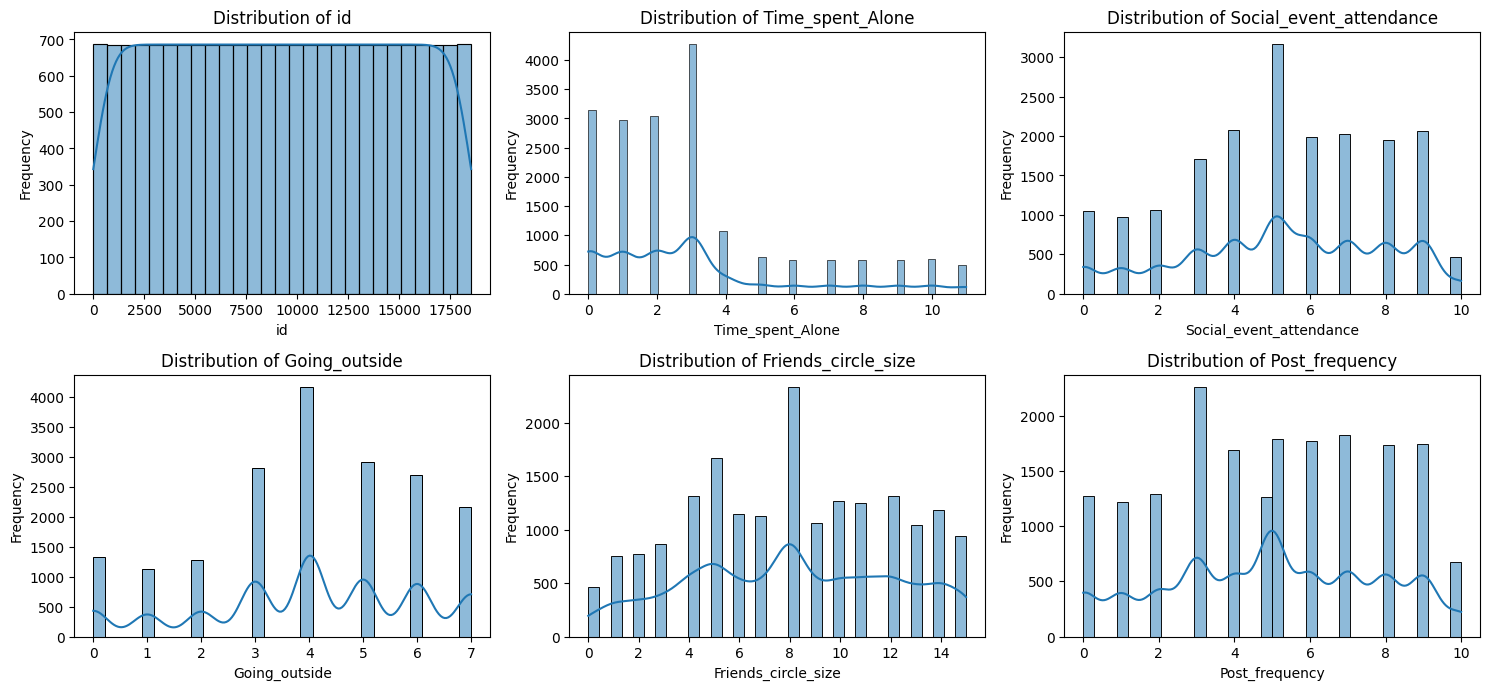

Statistical summary of numerical features:
                 id  Time_spent_Alone  Social_event_attendance  Going_outside  \
count  18524.000000      18524.000000             18524.000000   18524.000000   
mean    9261.500000          3.137764                 5.265106       4.044319   
std     5347.562529          2.905696                 2.664215       1.979276   
min        0.000000          0.000000                 0.000000       0.000000   
25%     4630.750000          1.000000                 3.000000       3.000000   
50%     9261.500000          3.000000                 5.265106       4.000000   
75%    13892.250000          4.000000                 7.000000       6.000000   
max    18523.000000         11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count         18524.000000    18524.000000  
mean              7.996737        4.982097  
std               4.101561        2.779168  
min               0.000000        0.000000  
25

In [75]:
# Data visulization 
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Personality', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()
# Plotting the distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Statistical summary of numerical features
print("Statistical summary of numerical features:")
print(df.describe())


## Train Test Split & Model Training


In [54]:
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# Splitting the data into features and target variable
X = cleaned_df.drop('Personality', axis=1)
y = cleaned_df['Personality']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Displaying the shapes of the training and testing sets
print("Shapes of the training and testing sets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")


# Displaying the first few rows of the training set
print("First few rows of the training set:")
print(X_train.head())
# Displaying the first few rows of the target variable
print("First few rows of the target variable:")
print(y_train.head())


Shapes of the training and testing sets:
X_train: (14819, 8), y_train: (14819,)
First few rows of the training set:
          id  Time_spent_Alone  Stage_fear  Social_event_attendance  \
1799    1799          0.090909           0                      0.7   
11931  11931          0.181818           0                      0.4   
14307  14307          0.363636           0                      0.5   
12157  12157          0.272727           0                      0.6   
18124  18124          0.181818           0                      0.7   

       Going_outside  Drained_after_socializing  Friends_circle_size  \
1799        0.571429                          0                 10.0   
11931       0.857143                          0                  6.0   
14307       0.714286                          0                  7.0   
12157       0.577760                          0                  8.0   
18124       1.000000                          0                 15.0   

       Post_frequency  


In [55]:
# Importing models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = LogisticRegression(max_iter=1000)
# Fitting the model on the training data
model.fit(X_train, y_train)

print("Model training completed.")



Model training completed.


In [56]:
# Importing accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# Making predictions on the test set
y_pred = model.predict(X_test)
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy * 100:.2f}")

# Importing confusion_matrix and classification_report from sklearn
from sklearn.metrics import confusion_matrix, classification_report
# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Displaying confusion matrix
print("Confusion Matrix:")
print(cm)


# Calculating classification report
report = classification_report(y_test, y_pred)
# Displaying classification report
print("Classification Report:")
print(report)

# Importing joblib to save the model
import joblib
# Saving the trained model to a file
joblib.dump(model, 'personality_model.pkl')


Model accuracy: 96.84
Confusion Matrix:
[[2703   50]
 [  67  885]]
Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2753
   Introvert       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



['personality_model.pkl']

In [57]:
# loading model from a file
loaded_model = joblib.load('personality_model.pkl')
# Making predictions using the loaded model
sample_data = X_test.sample(5)
predictions = loaded_model.predict(sample_data)
print(sample_data)


# Displaying the predictions
print("Predictions for the sample data:")
print(predictions)



          id  Time_spent_Alone  Stage_fear  Social_event_attendance  \
11773  11773          0.363636           1                      0.0   
6367    6367          0.363636           0                      0.7   
905      905          0.000000           0                      0.7   
9431    9431          0.000000           0                      0.9   
16491  16491          0.272727           0                      0.8   

       Going_outside  Drained_after_socializing  Friends_circle_size  \
11773       0.142857                          1             4.000000   
6367        0.714286                          0            13.000000   
905         0.857143                          0             5.000000   
9431        0.571429                          0             7.996737   
16491       0.571429                          0            13.000000   

       Post_frequency  
11773             0.0  
6367             10.0  
905               9.0  
9431              5.0  
16491             4.

##  Predicting the personality Type using Trained Logistics Regression Model

### Loading new Dataset

In [58]:
# Predicting the personality type for a new sample
file_path = r'D:\Local Disk\_python_prog\awfera ML\test.csv'
# Reading the new sample data
new_data = pd.read_csv(file_path)
# pringint the first few rows of the new data
print("First few rows of the new data:")
print(new_data.head())

First few rows of the new data:
      id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0  18524               3.0         No                      7.0            4.0   
1  18525               NaN        Yes                      0.0            0.0   
2  18526               3.0         No                      5.0            6.0   
3  18527               3.0         No                      4.0            4.0   
4  18528               9.0        Yes                      1.0            2.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency  
0                        No                  6.0             NaN  
1                       Yes                  5.0             1.0  
2                        No                 15.0             9.0  
3                        No                  5.0             6.0  
4                       Yes                  1.0             1.0  


### Preprocessing the Dataset


In [59]:
# Preprocessing the new data
pd.isnull(new_data).sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [60]:
# handling missing values in the new data
# Filling missing values in 'Time_spent_Alone' with the mean
new_data['Time_spent_Alone'].fillna(new_data['Time_spent_Alone'].mean(), inplace=True)
# Filling missing values in 'Stage_fear' with the mode of 'Stage_fear'
new_data['Stage_fear'].fillna(new_data['Stage_fear'].mode()[0], inplace=True)
# Filling missing values in 'Social_event_attendance' with the mean
new_data['Social_event_attendance'].fillna(new_data['Social_event_attendance'].mean(), inplace=True)
# Filling missing values in 'Going_outside' with the mean
new_data['Going_outside'].fillna(new_data['Going_outside'].mean(), inplace=True)
# Filling missing values in 'Drained_after_socializing' with the mode
new_data['Drained_after_socializing'].fillna(new_data['Drained_after_socializing'].mode()[0], inplace=True)
# Filling missing values in 'Friends_circle_size' with the mean
new_data['Friends_circle_size'].fillna(new_data['Friends_circle_size'].mean(), inplace=True)
# Filling missing values in 'Post_frequencye' with the mean
new_data['Post_frequency'].fillna(new_data['Post_frequency'].mean(), inplace=True)

In [61]:
pd.isnull(new_data).sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64

### Scalling the Dataset


In [62]:
scaller = MinMaxScaler()
new_data[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside']] = scaller.fit_transform(new_data[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside']])

In [63]:
le = LabelEncoder()
# Encoding categorical variables in the new data
new_data[['Stage_fear', 'Drained_after_socializing']] = new_data[['Stage_fear', 'Drained_after_socializing']].apply(le.fit_transform)


In [64]:
print("First few rows of the preprocessed new data:")
print(new_data.head())

First few rows of the preprocessed new data:
      id  Time_spent_Alone  Stage_fear  Social_event_attendance  \
0  18524          0.272727           0                      0.7   
1  18525          0.283352           1                      0.0   
2  18526          0.272727           0                      0.5   
3  18527          0.272727           0                      0.4   
4  18528          0.818182           1                      0.1   

   Going_outside  Drained_after_socializing  Friends_circle_size  \
0       0.571429                          0                  6.0   
1       0.000000                          1                  5.0   
2       0.857143                          0                 15.0   
3       0.571429                          0                  5.0   
4       0.285714                          1                  1.0   

   Post_frequency  
0        5.028958  
1        1.000000  
2        9.000000  
3        6.000000  
4        1.000000  


In [65]:
# making prediction on the new data
new_predictions = loaded_model.predict(new_data)
# Displaying the predictions for the new data
print("Predictions for the new data:")
print(new_predictions)

# Saving the predictions to a CSV file
new_data['Predicted_Personality'] = new_predictions
new_data.to_csv('predicted_personality.csv', index=False)
print("Predictions saved to 'predicted_personality.csv'.")


Predictions for the new data:
['Extrovert' 'Introvert' 'Extrovert' ... 'Extrovert' 'Extrovert'
 'Introvert']
Predictions saved to 'predicted_personality.csv'.


## Training Random Forest Model


In [66]:
# training random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fitting the random forest model on the training data
rf_model.fit(X_train, y_train)
# printing the model training completion message
print("Random Forest model training completed.")


Random Forest model training completed.


In [67]:
# Making predictions on the test set using the random forest model
rf_y_pred = rf_model.predict(X_test)
# Calculating the accuracy of the random forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest model accuracy: {rf_accuracy * 100:.2f}")
# Calculating confusion matrix for the random forest model
rf_cm = confusion_matrix(y_test, rf_y_pred)
# Displaying confusion matrix for the random forest model
print("Random Forest Confusion Matrix:")
print(rf_cm)
# Calculating classification report for the random forest model
rf_report = classification_report(y_test, rf_y_pred)

# # Saving the random forest model to a file
# joblib.dump(rf_model, 'rf_personality_model.pkl')




Random Forest model accuracy: 96.82
Random Forest Confusion Matrix:
[[2703   50]
 [  68  884]]


In [68]:
print(new_data.columns)

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Predicted_Personality'],
      dtype='object')


In [69]:
print(new_data.head())

      id  Time_spent_Alone  Stage_fear  Social_event_attendance  \
0  18524          0.272727           0                      0.7   
1  18525          0.283352           1                      0.0   
2  18526          0.272727           0                      0.5   
3  18527          0.272727           0                      0.4   
4  18528          0.818182           1                      0.1   

   Going_outside  Drained_after_socializing  Friends_circle_size  \
0       0.571429                          0                  6.0   
1       0.000000                          1                  5.0   
2       0.857143                          0                 15.0   
3       0.571429                          0                  5.0   
4       0.285714                          1                  1.0   

   Post_frequency Predicted_Personality  
0        5.028958             Extrovert  
1        1.000000             Introvert  
2        9.000000             Extrovert  
3        6.000000   

In [70]:
new_test_data = new_data.drop('Predicted_Personality', axis=1)
print(new_test_data.head())


      id  Time_spent_Alone  Stage_fear  Social_event_attendance  \
0  18524          0.272727           0                      0.7   
1  18525          0.283352           1                      0.0   
2  18526          0.272727           0                      0.5   
3  18527          0.272727           0                      0.4   
4  18528          0.818182           1                      0.1   

   Going_outside  Drained_after_socializing  Friends_circle_size  \
0       0.571429                          0                  6.0   
1       0.000000                          1                  5.0   
2       0.857143                          0                 15.0   
3       0.571429                          0                  5.0   
4       0.285714                          1                  1.0   

   Post_frequency  
0        5.028958  
1        1.000000  
2        9.000000  
3        6.000000  
4        1.000000  


In [71]:
# making predictions on a new dataset
re_predictions = rf_model.predict(new_test_data)
# Displaying the predictions for the new data using the random forest model
print("Random Forest Predictions for the new data:")
print(re_predictions)

# Saving the predictions to a CSV file using the random forest model
new_test_data['Predicted_Personality_RF'] = re_predictions
new_test_data.to_csv('predicted_personality_rf.csv', index=False)
print("Random Forest predictions saved to 'predicted_personality_rf.csv'.")




Random Forest Predictions for the new data:
['Extrovert' 'Introvert' 'Extrovert' ... 'Extrovert' 'Extrovert'
 'Introvert']
Random Forest predictions saved to 'predicted_personality_rf.csv'.
